In [6]:
# %pip install --force-reinstall --no-deps torch==2.2.2 torchvision==0.17.2

In [7]:
# %pip install statsforecast mlforecast pandas polars pyarrow holidays lightgbm neuralforecast seaborn

In [8]:
import pandas as pd
from utils.constants import FREQ_DAILY, FREQ_MONTHLY, FAMILY_BASELINE, FAMILY_STATISTICAL, FAMILY_MACHINE_LEARNING, FAMILY_DEEP_LEARNING, SPLIT_VAL
from utils.preprocessing import load_daily_data, load_monthly_data
from utils.baseline import run_baseline_forecast_daily, run_baseline_forecast_monthly
from utils.statistical import run_statistical_forecast_daily, run_statistical_forecast_monthly
from utils.machine_learning import run_machine_learning_forecast_daily, run_machine_learning_forecast_monthly
from utils.deep_learning import run_deep_learning_forecast_daily, run_deep_learning_forecast_monthly
from utils.metrics import calculate_metrics
from utils.metric_utils import load_overall_metrics, merge_prediction_dfs, find_n_best_models
from utils.visualizations import plot_forecasts, plot_residuals


### Loading Data:

In [9]:
daily_train, daily_val, daily_test = load_daily_data(use_existing=True)
monthly_train, monthly_val, monthly_test = load_monthly_data(use_existing=True)

### Forecasts:

##### Baseline Forecast:

In [10]:
base_daily_val, base_daily_test = run_baseline_forecast_daily(daily_train, daily_val, daily_test, use_existing=True)
base_monthly_val, base_monthly_test = run_baseline_forecast_monthly(monthly_train, monthly_val, monthly_test, use_existing=True)

##### Statistical Forecast:

In [11]:
stat_daily_val, stat_daily_test = run_statistical_forecast_daily(daily_train, daily_val, daily_test, use_existing=True)
stat_monthly_val, stat_monthly_test = run_statistical_forecast_monthly(monthly_train, monthly_val, monthly_test, use_existing=True)

##### Machine Learning Forecast:

In [12]:
ml_daily_val, ml_daily_test = run_machine_learning_forecast_daily(daily_train, daily_val, daily_test, use_existing=True)
ml_monthly_val, ml_monthly_test = run_machine_learning_forecast_monthly(monthly_train, monthly_val, monthly_test, use_existing=True)

##### Deep Learning Forecast:

In [13]:
dl_daily_val, dl_daily_test = run_deep_learning_forecast_daily(daily_train, daily_val, daily_test, use_existing=True)
dl_monthly_val, dl_monthly_test = run_deep_learning_forecast_monthly(monthly_train, monthly_val, monthly_test, use_existing=True)

### Metrics:

##### Baseline Metrics:

In [14]:
base_metrics = pd.concat([
    calculate_metrics(base_daily_val, FAMILY_BASELINE, FREQ_DAILY, SPLIT_VAL, use_existing=True),
    calculate_metrics(base_monthly_val, FAMILY_BASELINE, FREQ_MONTHLY, SPLIT_VAL, use_existing=True)
], ignore_index=True).sort_values(by=["MAPE"]).reset_index(drop=True)

##### Statistical Metrics:

In [15]:
stat_metrics = pd.concat([
    calculate_metrics(stat_daily_val, FAMILY_STATISTICAL, FREQ_DAILY, SPLIT_VAL, use_existing=True),
    calculate_metrics(stat_monthly_val, FAMILY_STATISTICAL, FREQ_MONTHLY, SPLIT_VAL, use_existing=True)
], ignore_index=True).sort_values(by=["MAPE"]).reset_index(drop=True)

##### Machine Learning Metrics:

In [16]:
ml_metrics = pd.concat([
    calculate_metrics(ml_daily_val, FAMILY_MACHINE_LEARNING, FREQ_DAILY, SPLIT_VAL, use_existing=True),
    calculate_metrics(ml_monthly_val, FAMILY_MACHINE_LEARNING, FREQ_MONTHLY, SPLIT_VAL, use_existing=True)
], ignore_index=True).sort_values(by=["MAPE"]).reset_index(drop=True)

##### Deep Learning Metrics:

In [17]:
dl_metrics = pd.concat([
    calculate_metrics(dl_daily_val, FAMILY_DEEP_LEARNING, FREQ_DAILY, SPLIT_VAL, use_existing=True),
    calculate_metrics(dl_monthly_val, FAMILY_DEEP_LEARNING, FREQ_MONTHLY, SPLIT_VAL, use_existing=True)
], ignore_index=True).sort_values(by=["MAPE"]).reset_index(drop=True)

##### Overall metrics:

In [18]:
overall_metrics = load_overall_metrics()

In [19]:
merged_daily = merge_prediction_dfs(base_daily_val, base_daily_test, stat_daily_val, stat_daily_test, ml_daily_val, ml_daily_test, dl_daily_val, dl_daily_test)
merged_monthly = merge_prediction_dfs(base_monthly_val, base_monthly_test, stat_monthly_val, stat_monthly_test, ml_monthly_val, ml_monthly_test, dl_monthly_val, dl_monthly_test)

In [20]:
best_3_all = find_n_best_models(overall_metrics, 3, merged_daily, merged_monthly)
best_3_mon = find_n_best_models(overall_metrics, 3, merged_daily, merged_monthly, frequencies=[FREQ_MONTHLY])
best_3_day = find_n_best_models(overall_metrics, 3, merged_daily, merged_monthly, frequencies=[FREQ_DAILY])
best_per_fam = find_n_best_models(overall_metrics, 1, merged_daily, merged_monthly, best_per_family=True)

best_1 = {0:best_3_all[0]}
best_1_mon = {0:best_3_mon[0]}
best_1_day = {0:best_3_day[0]}

# Visualizations

## Best Model:
monthly:

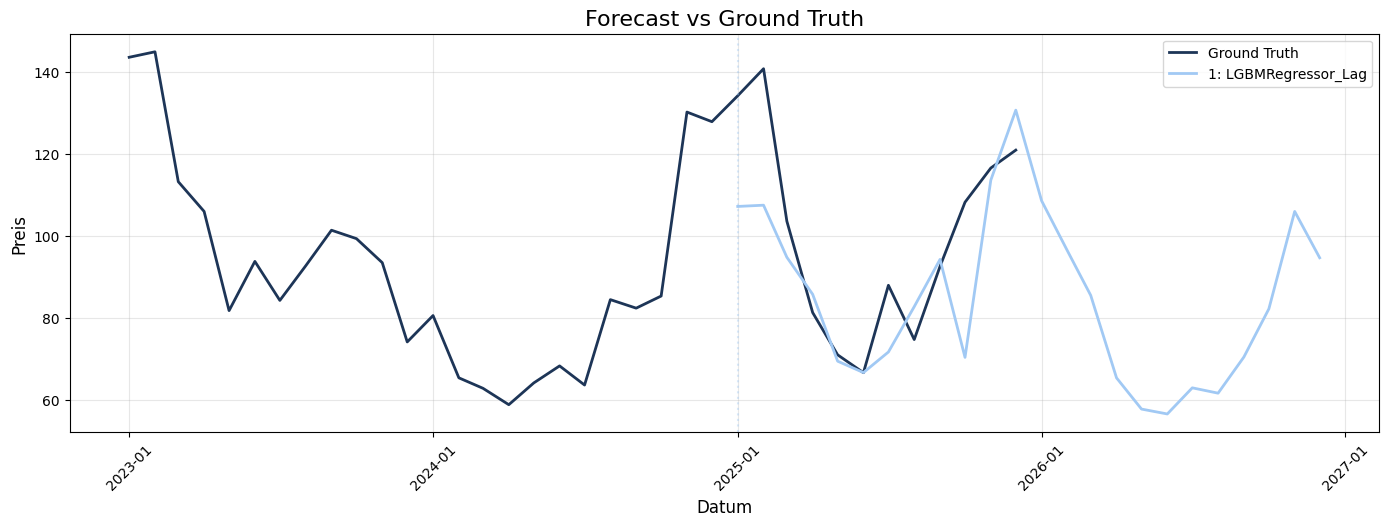

In [21]:
plot_forecasts(best_1, 'best_model_monthly')

daily:

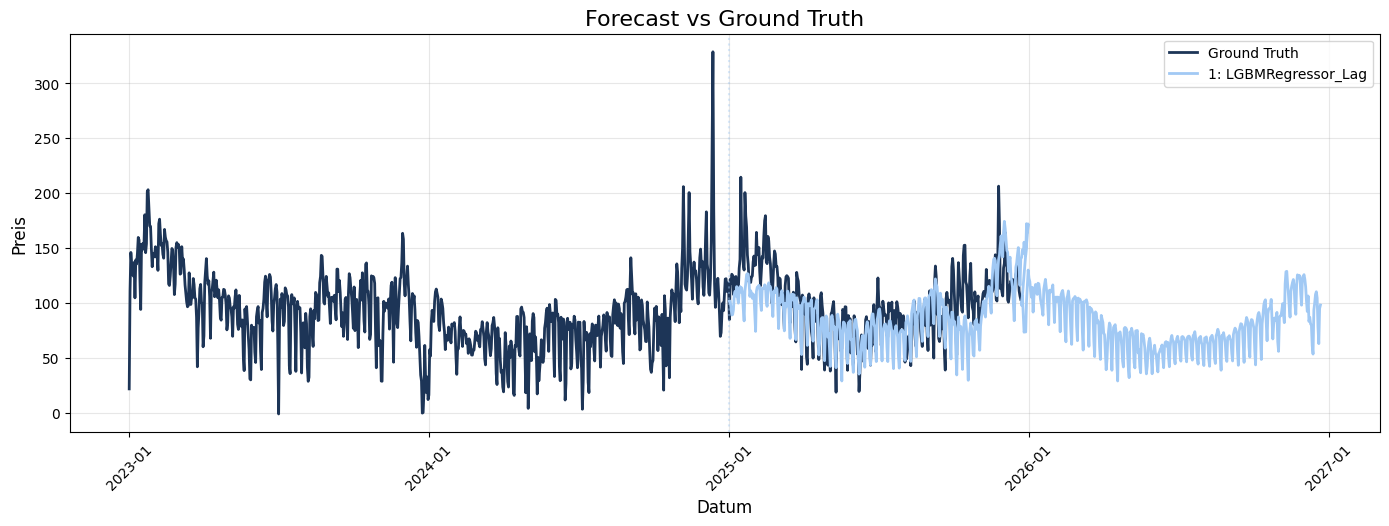

In [22]:
plot_forecasts(best_1_day, 'best_model_daily', frequency=FREQ_DAILY)

## Best 3 Models
mixed:


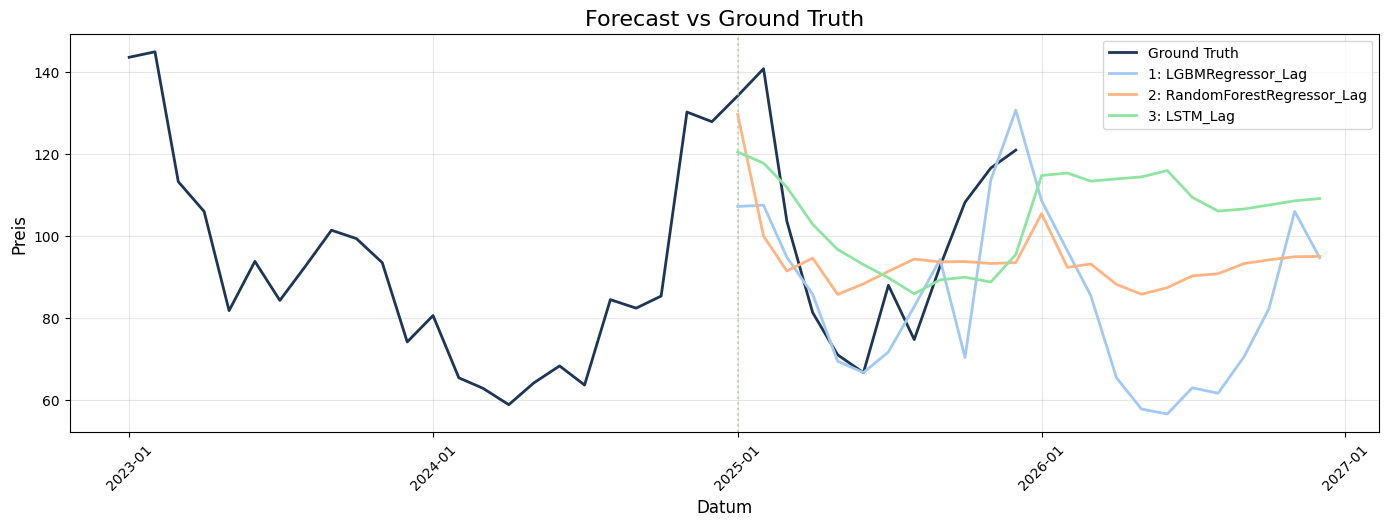

In [23]:
plot_forecasts(best_3_all, 'best_3_models_both', frequency=FREQ_MONTHLY)

monthly

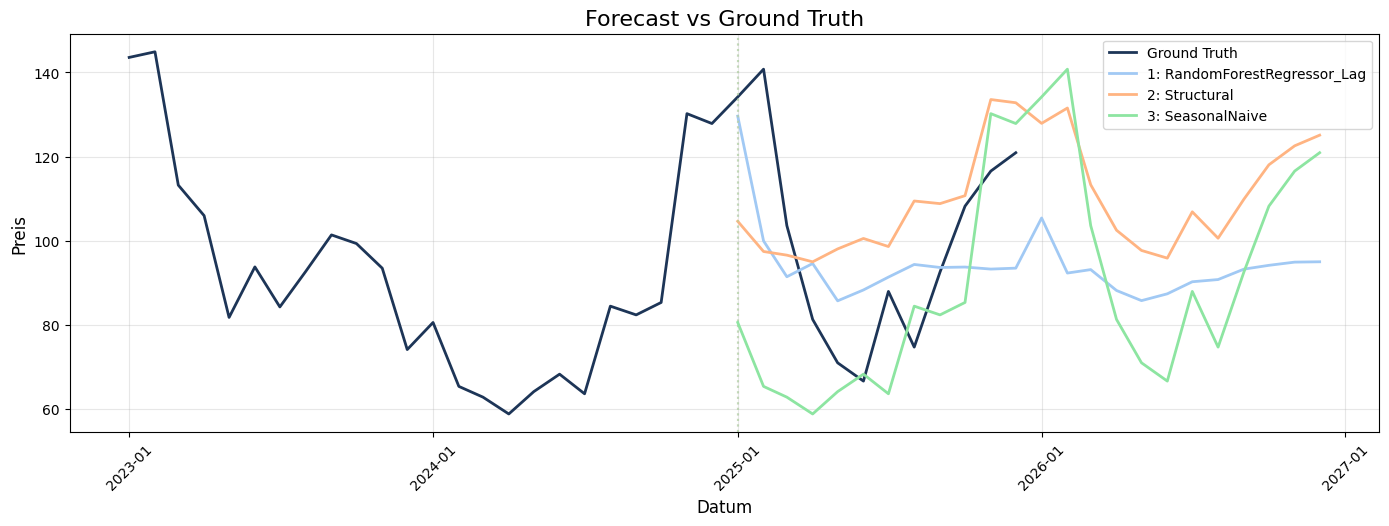

In [24]:
plot_forecasts(best_3_mon, 'best_3_models_monthly', frequency=FREQ_MONTHLY)

daily:

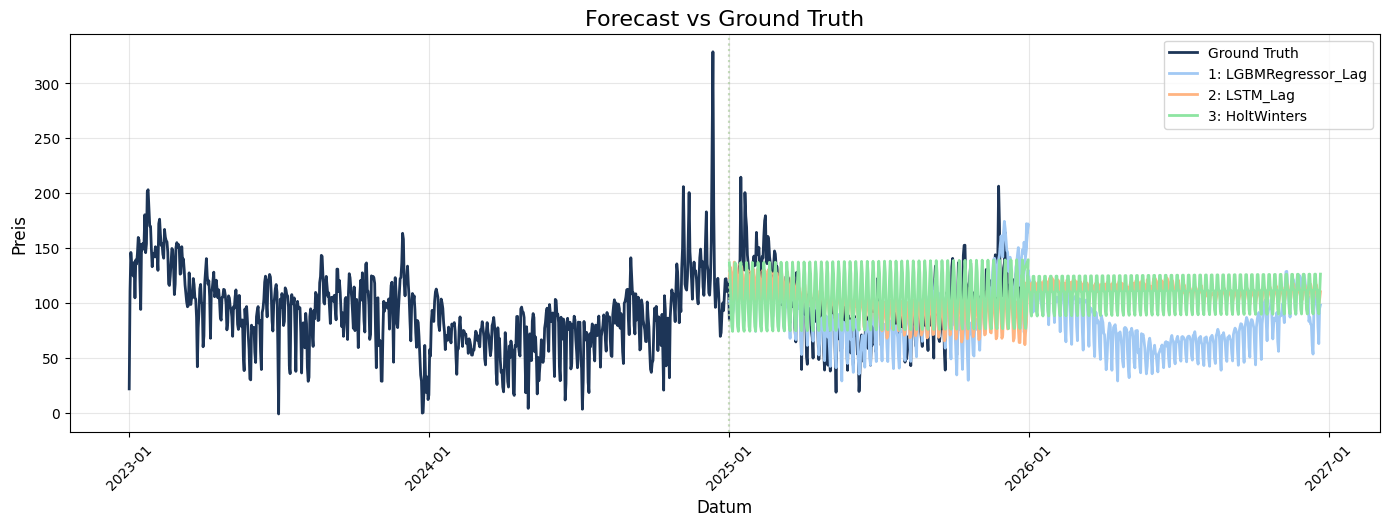

In [25]:
plot_forecasts(best_3_day, 'best_3_models_daily', frequency=FREQ_DAILY)

## Best per Family



Family: ml -> LGBMRegressor_Lag
Family: dl -> LSTM_Lag
Family: base -> Structural
Family: stat -> HoltWinters


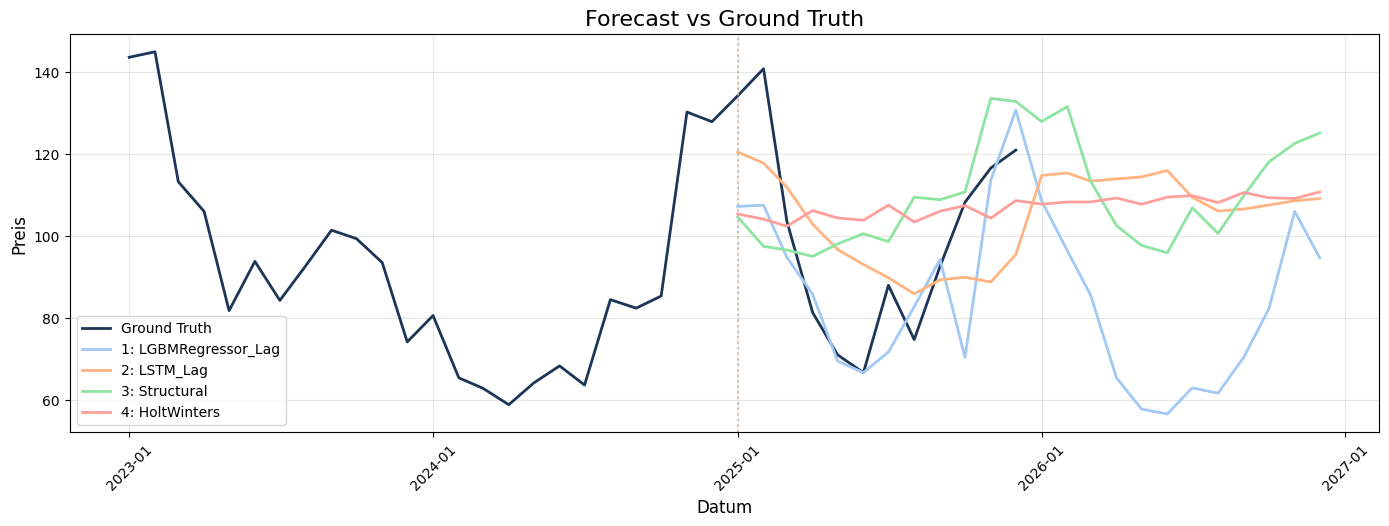

In [26]:
for x in range(len(best_per_fam)):
    print(f"Family: {best_per_fam[x]['family']} -> {best_per_fam[x]['name']}")
plot_forecasts(best_per_fam, 'best_per_family', frequency=FREQ_MONTHLY)

## Actual vs Prediction scatter plot

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


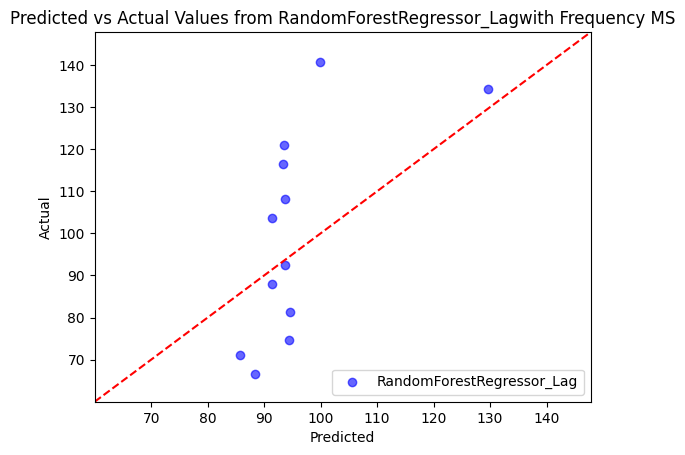

In [27]:
plot_residuals(best_1_mon)

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


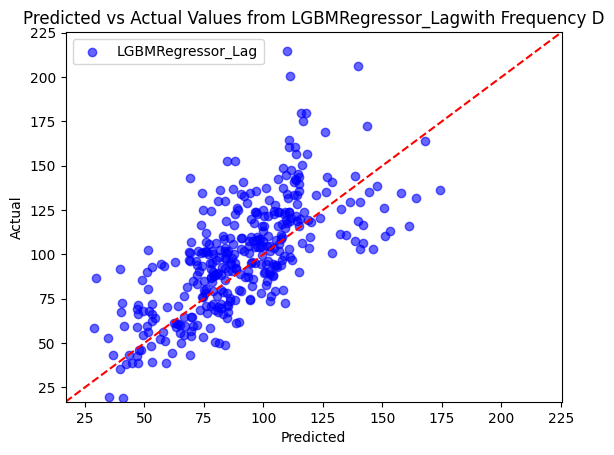

In [28]:
plot_residuals(best_1_day)

## PREDICTIONS for January 2026:

In [29]:
best_1

{0: {'name': 'LGBMRegressor_Lag',
  'family': 'ml',
  'frequency': 'D',
  'metrics': {'MAE': 13.468348697968414,
   'RMSE': 18.478178130063736,
   'MAPE': 0.1206841815640005,
   'WAPE': 0.13484107396434},
  'data':     unique_id         ds  LGBMRegressor_Lag
  0     Austria 2025-01-01         101.688448
  1     Austria 2025-01-02         101.802452
  2     Austria 2025-01-03          96.010350
  3     Austria 2025-01-04          89.030283
  4     Austria 2025-01-05          89.496594
  ..        ...        ...                ...
  725   Austria 2026-12-18         104.596315
  726   Austria 2026-12-19          78.149141
  727   Austria 2026-12-20          63.008524
  728   Austria 2026-12-21          95.061265
  729   Austria 2026-12-22          98.135814
  
  [730 rows x 3 columns]}}

In [30]:
print(f"Best overall model: {best_1[0]['name']}")
print(f"from family: {best_1[0]['family']}")
print(f"with frequency: {best_1[0]['frequency']}")

print(f"Statistics for best model:")
display(overall_metrics.head(1))


Best overall model: LGBMRegressor_Lag
from family: ml
with frequency: D
Statistics for best model:


,Model,Family,Frequency,Split,MAE,RMSE,MAPE,WAPE
0,LGBMRegressor_Lag,ml,D,val,13.468349,18.478178,0.120684,0.134841


Prediciton for the value in January 2026:


,ds,LGBMRegressor_Lag
374,2026-01-01,122.518236
375,2026-01-02,119.508899
376,2026-01-03,111.072717
377,2026-01-04,105.230009
378,2026-01-05,114.254349
379,2026-01-06,91.710414
380,2026-01-07,105.807560
381,2026-01-08,112.832009
382,2026-01-09,116.894069
383,2026-01-10,114.907592


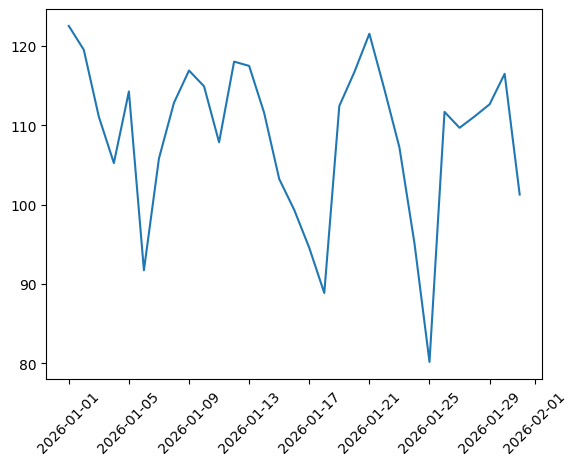

In [31]:
from matplotlib import pyplot as plt
print("Prediciton for the value in January 2026:")

data = best_1[0]['data']
pred_df = data[(data['ds'] >= '2026-01-01') & (data['ds'] <= '2026-01-31')]
pred_df = pred_df.drop(columns=['unique_id'])
display(pred_df)

plt.plot(pred_df['ds'], pred_df.drop(columns=['ds']).sum(axis=1))
plt.tick_params(axis='x', rotation=45)
plt.savefig('../results/visualizations/forecasts/best_model_jan2026.png', bbox_inches='tight')


Prediciton for the values in 2026 per month:


,ds,LGBMRegressor_Lag
0,2026-01-01,108.581334
1,2026-02-01,96.381697
2,2026-03-01,85.517592
3,2026-04-01,65.403608
4,2026-05-01,57.796569
5,2026-06-01,56.603165
6,2026-07-01,62.974529
7,2026-08-01,61.673220
8,2026-09-01,70.495409
9,2026-10-01,82.236389


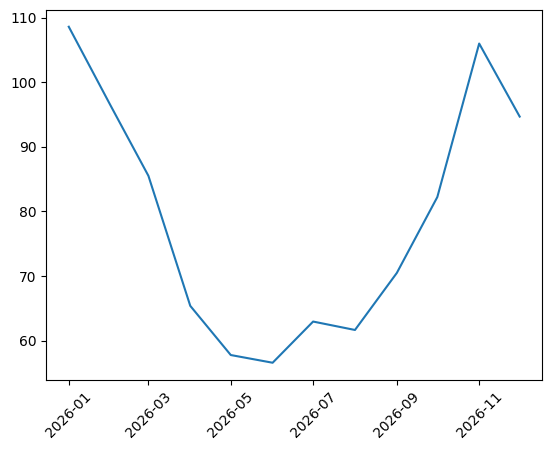

In [32]:
print("Prediciton for the values in 2026 per month:")

data = best_1[0]['data']
pred_year = data[(data['ds'] >= '2026-01-01') & (data['ds'] <= '2026-12-31')]
pred_year = pred_year.drop(columns=['unique_id'])
    
    
prediction_df = pred_year.copy()
prediction_df['ds'] = pd.to_datetime(prediction_df['ds']).dt.to_period('M').dt.to_timestamp()
columns = [c for c in prediction_df.columns if c not in ['ds']]
prediction_df = prediction_df.groupby(['ds'])[columns].mean().reset_index()
display(prediction_df)


plt.plot(prediction_df['ds'], prediction_df.drop(columns=['ds']).sum(axis=1))
plt.tick_params(axis='x', rotation=45)
plt.savefig('../results/visualizations/forecasts/best_model_2026.png', bbox_inches='tight')